In [1]:
# Load time-lapse.
from skimage.io import imread
time_mat = imread('/home/jiongyi/Documents/johnny/TIRF Candy Cane Raw Data and Kymographs/Candy Cane Raw Data/375_nM_tpm_4s_time_lapse.tif')
no_time_points, no_rows, no_columns = time_mat.shape

In [2]:
# Subtract background.
from skimage.morphology import white_tophat, rectangle
from numpy import stack, array
tophat_mat = stack(array([white_tophat(time_mat[i, :, :], selem = rectangle(3, 10)) for i in range(no_time_points)]), axis = 0)

In [3]:
# Blurr.
from skimage.filters import gaussian
blurred_mat = stack(array([gaussian(tophat_mat[i, :, :], sigma = (3, 1)) for i in range(no_time_points)]))

In [13]:
# Binarize.
from skimage.filters import threshold_li
from skimage.morphology import thin
from numpy import max
li_threshold = threshold_li(max(blurred_mat, axis = 0))
li_mat = stack(array([blurred_mat[i, :, :] > li_threshold for i in range(no_time_points)]), axis = 0)

In [14]:
# Fit active contour.
from skimage.segmentation import active_contour
from skimage.measure import label, regionprops
bw_im = li_mat[-1, :, :]
raw_im = blurred_mat[-1, :, :]
props_list = regionprops(label(bw_im), raw_im)
x_col = props_list[10].coords[:, 1]
y_col = props_list[10].coords[:, 0]
init_mat = array([x_col, y_col]).T
snake_mat = active_contour(raw_im, init_mat, gamma = 0.01, bc = 'periodic')

In [6]:
# Save.
from skimage.io import imsave
from numpy import max
from skimage.util import img_as_uint
imsave('/home/jiongyi/Documents/johnny/blurred_time.tif', img_as_uint(blurred_mat))
imsave('/home/jiongyi/Documents/johnny/binarized_time.tif', img_as_uint(li_mat))

/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/jiongyi/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: /home/jiongyi/Documents/johnny/blurred_time.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


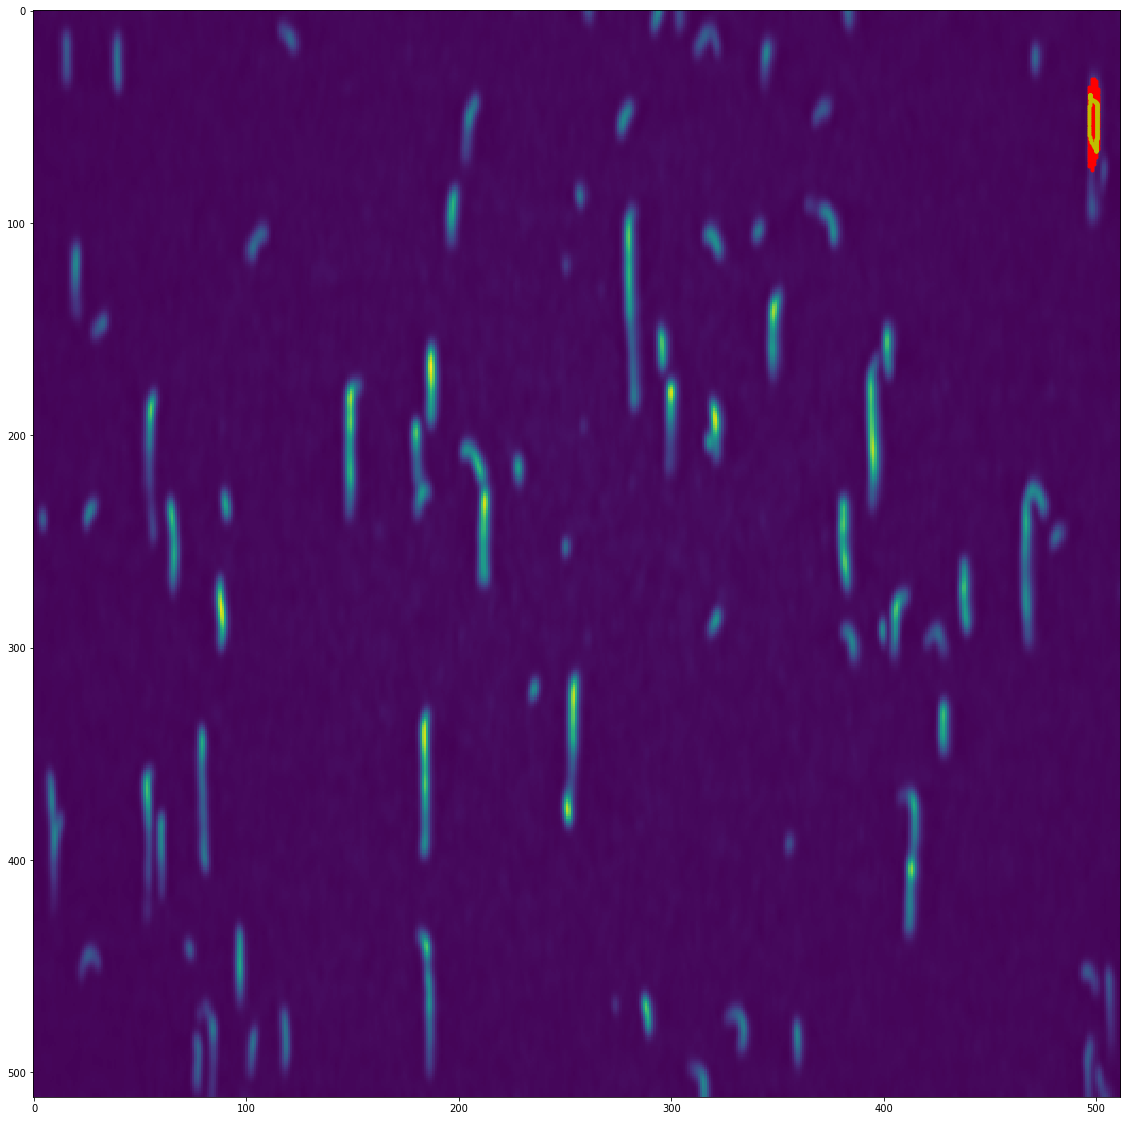

In [16]:
# Display.
%matplotlib inline
from matplotlib.pyplot import subplots
fig1_hand, axes1_hand = subplots()
fig1_hand.set_figheight(20)
fig1_hand.set_figwidth(20)
axes1_hand.imshow(raw_im)
axes1_hand.plot(x_col, y_col, 'r.')
axes1_hand.plot(snake_mat[:, 0], snake_mat[:, 1], 'y.')